<a href="https://colab.research.google.com/github/dswendersonmelo/Data_Science/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Lisboa

Portugal é um intenso centro cultural e histórico, o primeiro lugar em que Oriente, Índias, Áfricas e Américas se encontraram. Até hoje, depois do período de colonização(hoje países independentes), mantêm estreitas ligações. E isso vimos mais recentemente no esforço de tornar à língua portuguesa nos países regida das mesmas regras[¹](https://www.dicio.com.br/acordo-ortografico-regras-exemplos-contexto/#:~:text=O%20Acordo%20foi%20assinado%20em,Timor%2DLeste%20tamb%C3%A9m%20o%20assinou.).

Além disso, é um lugar querido para muitos brasileiros quando o assunto é turismo[²](https://viva-mundo.com/pt/noticia/post/conheca-os-principais-pontos-turisticos-de-lisboa-para-aproveitar-viagem#:~:text=O%20lugar%20queridinho,turismo%20pela%20cidade.), pois não necessita-se de visto[³](https://consuladoportugalsp.org.br/visitantes-brasileiros-em-portugal/) para realizar uma viajem, o que de certa forma agrega um baixo custo-benefício comparado a outros países.

E o centro turístico lusitano é a região de Lisboa(a cidade e municípios do distrito) que tem uma participação em 1/3 do PIB nacional no setor de Turismo[⁴](https://www.lisboa.pt/fileadmin/atualidade/publicacoes_periodicas/economia/economia_lisboa_em_numeros_2020.pdf). O que denota a grande relevância para a economia.

Com isso, é muito importante a necessidade de locais para os turistas ficarem(hóteis, pousadas, etc.). E é aí que entra o Airbnb, uma plataforma online de hospedagens para viajantes do mundo inteiro, que em 2019 atingiu o marco de 500 milhões de hóspedes[⁵](https://www.revistahoteis.com.br/airbnb-atinge-500-milhoes-de-hospedes/) sem ter um único hotel.

E uma das iniciativas do Airbnb é disponilizar por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) dados do site para as principais cidades do mundo, assim, permitindo-nos desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="50%" src="https://freesider.com.br/wp-content/uploads/2017/01/Temple-Airbnb-Logo-7.png"></center>


**Neste notebook, iremos realizar uma análise explorátoria sobre a base de dados referente ao Distrito de Lisboa e ver quais *insights* podemos extrair.**


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

**IMPORTANTE:** O portal está em constante evolução, e em algum momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-12-08/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria o código.

Por isso disponiblizo [aqui](https://github.com/dswendersonmelo/Data_Science/raw/main/listings.csv) o conjunto de dados usado para que você sempre possa utilizar esse material.

Com isso em mente, vamos ao projeto.


In [ ]:
#importar os pacotes necessários para a análise 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importar o arquivo listings.csv para um DataFrame
DF = pd.read_csv('https://github.com/dswendersonmelo/Data_Science/raw/main/listings.csv')


## Análise dos Dados

O objetivo desta etapa é criar uma consciência situacional inicial e permitir a compreesão de como os dados estão estruturados.

**Dicionário de variáveis**



*  `id` - É o identificador exclusivo do Airbnb para anúncio de cada imóvel
*  `name` - Nome da propriedade
*  `host_id` - Identificador exclusivo do Airbnb para o anfitrião/usuário
*  `host_name` - Nome do anfitrião (geralmente apenas o primeiro nome)
*  `neighbourhood_group` - O grupo de bairros (que é geocodificado usando a latitude e longitude em relação aos bairros, conforme definido por *shapefiles* digitais abertos ou públicos)*
*  `neighbourhood` - Nome do bairro/freguesia
*  `latitude` - Coordenada da latitude do imóvel
*  `longitude` - Coordenada da longitude do imóvel
*  `room_type` - Informa o tipo de quarto
*  `price` - Preço para alugar o imóvel por noite em moeda local
*  `minimum_nights` - Número mínimo de pernoites para reservar
*  `number_of_reviews` - O número de avaliações que a propriedade possui
*  `last_review` - A data da última/mais recente avaliação
*  `reviews_per_month` - O número de avaliações que a propriedade tem por mês
*  `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
*  `availability_365` - O número de dias de disponibilidade dentro de 365 dias(OBS: pode não estar disponível porque foi reservado por um hóspede ou bloqueado pelo anfitrião)
*  `number_of_reviews_ltm` - O número de avaliações que a propriedade tem nos últimos 12 meses
*  `license` - A licença, autorização ou número de registro

NOTA : As informações referentes ao significado de cada variável pode ser acessada pelo [link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing) disponibilizado no portal *Inside Airbnb*.

(*) Conquanto a variável chama-se `neighbourhood_group` em nosso DataFrame, encontrei apenas, no dicionário de dados do portal, uma chamada `neighbourhood_group_cleansed`. E pela proximidade do significado semântico, considerei que denotavam as mesmas informações.




Antes de iniciar qualquer análise, vamos ver a "cara" do nosso *dataset* a partir das 5 primeiras entradas e 5 últimas entradas.

In [ ]:
DF.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,32,2021-11-01,0.36,1,315,6,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,50,2,127,2021-11-27,1.37,1,325,14,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,60,5,337,2021-12-03,2.53,1,190,13,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,60,2,299,2021-12-03,2.57,1,302,40,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,957,2,64,2021-11-14,0.48,2,248,9,55695/AL


In [ ]:
DF.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
18522,53715760,Zen Nest in the heart of Lisbon,236728213,Carolina,Lisboa,Santo Antnio,38.721587,-9.143302,Entire home/apt,40,5,0,NaN,NaN,1,95,0,Exempt
18523,53717168,NEW! Charming 2 bed w/patio in historical Mour...,186259819,Isabelle,Lisboa,Santa Maria Maior,38.716469,-9.132524,Entire home/apt,75,5,0,NaN,NaN,8,258,0,68987/AL
18524,53718454,New Avenues Dreamy Home,435069218,Alexandra,Lisboa,Avenidas Novas,38.740442,-9.149162,Entire home/apt,150,1,0,NaN,NaN,1,0,0,121427/AL
18525,53723356,Alfama Top Location 2,6604033,Joao,Lisboa,Santa Maria Maior,38.715410,-9.132390,Entire home/apt,55,1,0,NaN,NaN,4,246,0,29524/AL
18526,53731212,Stunning Apartment in Heart of Lisbon by Lovel...,435177300,William,Lisboa,Santa Maria Maior,38.709519,-9.136877,Entire home/apt,114,2,0,NaN,NaN,1,256,0,104887/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos verificar os tipos das variáveis e a dimensionalidade de nosso DataFrame. 

Vale lembrar que este *dataset* é uma versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 18.526 entradas e 74 variáveis (`listings.csv.gz`).

In [ ]:
#identificar o volume 
print("Quantidade de entradas:", DF.shape[0])
print("Quantidade de variáveis:", DF.shape[1], '\n')

#identificar os tipos
print(DF.dtypes)


Quantidade de entradas: 18527
Quantidade de variáveis: 18 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante logo no ínicio verificar a presença de valores ausentes nas linhas e com isso entender se são significativos em relação ao total de entradas. Visto que a presença das mesmas pode influir consideravelmente na análise que se quer fazer. 

Verifica-se:  
* Nas variáveis `reviews_per_month` e `last_review`  cerca de 13% de valores ausentes;
* Na variável `license` cerca de 9,7% de valores ausentes;
* E nas variáveis `host_name` e `name` cerca de 0,12% e 0,04%, respectivamente, de valores ausentes.

Pode-se fazer algumas perguntas para melhor compreender estes *missing datas*, que ficariam para uma análise posterior mais aprofundada, como por exemplo:

* As variáveis `reviews_per_month` e `last_review` possuem a mesma porcentagem, isso quer dizer que estão relacionadas? Se sim, em que sentido estão relacionadas?
* Será que ainda estão vazias porque ainda não completaram um mês ou mesmo eram anúncios recentes ou que não tinham avaliações no momento da coleta destes dados?

* etc.

In [ ]:
# Identificar e ordenar em ordem decrescente os valores ausentes
((DF.isnull().sum() / DF.shape[0]) * 100).sort_values(ascending = False)

reviews_per_month                 13.526205
last_review                       13.526205
license                            9.710153
host_name                          0.124143
name                               0.043180
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

#### Limpeza dos Dados Ausentes

Para essa análise exploratória irei remover as colunas, `reviews_per_month` e `last_reviem` por possuirem valores ausentes e também porque não nos serviremos dela daqui em diante.

Também irei remover as entradas ausentes de `host_name` e `name` que representam um percentual muito pequeno e oferecem pouquissímos riscos na extração das informações dos dados.

E quanto a coluna `license`, irei remover tanto pelo motivo de que não a utilizaremos e porque apresentam outros problemas[⁵](https://eco.sapo.pt/2020/12/14/quase-metade-dos-al-no-airbnb-em-lisboa-nao-tem-licenca-valida/) que fogem ao escopo desta análise, tais são: múltiplos imóveis com a mesma licença, licença inválida etc.. Vejamos abaixo o uso de múltiplas licenças:

In [ ]:
DF.license.value_counts()

Exempt       1295
510363768      29
100844/AL      28
55201/AL       19
0/AL           19
             ... 
59255/AL        1
50050/AL        1
49633/AL        1
47967/AL        1
104887/AL       1
Name: license, Length: 11821, dtype: int64

Somente a licença de número 510363768 possui 29 imóveis registrados no site enquanto deveria ter somente um. Claro que aqui cabe alguns questionamentos, mas como disse não iremos abordar isto.

Prossigamos com a limpeza e para isso utilizarei dois métodos:

*  `.drop()`
*  `.dropna()`

In [ ]:
# Remover colunas reviews_per_month, last_review e license
DF = DF.drop(columns = ['reviews_per_month', 'last_review', 'license'])

# Remover as entradas ausentes de host_name e name
DF = DF.dropna(subset = ['host_name', 'name'], axis = 0)

In [ ]:
#Vê nova dimensão do Dataframe
print("Quantidade de entradas:", DF.shape[0])
print("Quantidade de variáveis:", DF.shape[1], '\n')

# Vericar a quantidade de entradas ausentes
DF.isnull().sum()

Quantidade de entradas: 18496
Quantidade de variáveis: 15 



id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para que tenhamos uma boa visualização da distribuição das variáveis irei plotar o histograma.

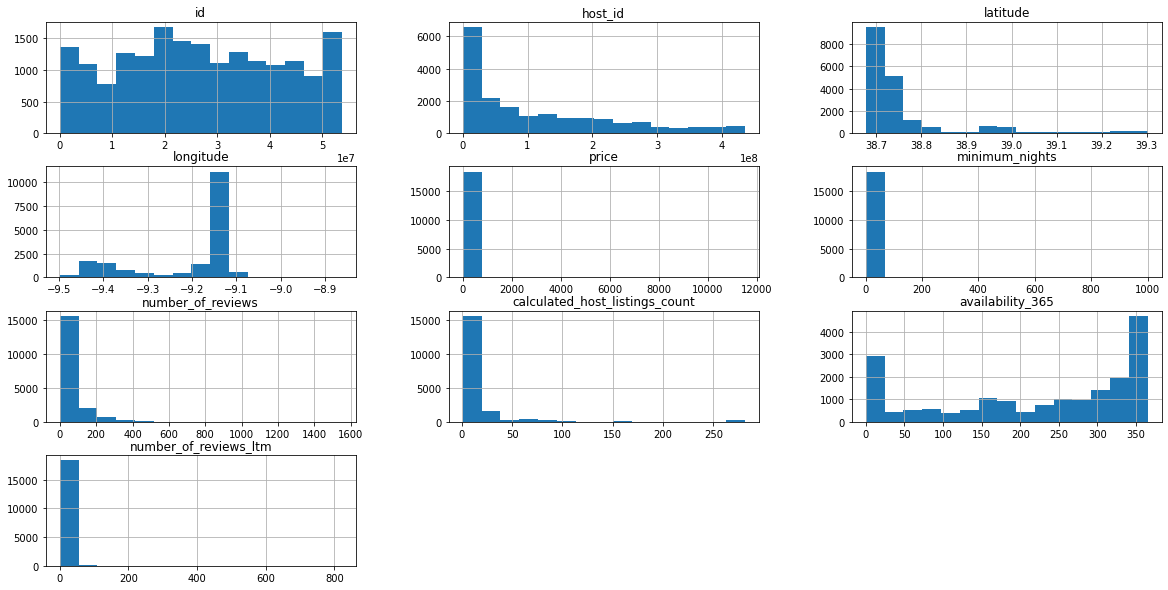

In [ ]:
DF.hist(figsize = (20, 10), bins = 15);

### **Q4. Há *outliers* presentes?**

É possível verificar indícios da presença de *outliers* observando as distribuições dos histogramas acima. Atente-se as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. 

Os *outliers* não seguem uma distribuição e eles se não tratados fazem com que ocorram distorções nas informações e nos gráficos. Para confirmar essa hipótese utilizaremos dois métodos rápidos para a detecção deles: 
*  Resumo estatístico com o método `.describe()`
*  Plotar `boxplots` para a variável

#### Resumo estatístico

In [ ]:
# Resumo estatístico de todas as variáveis numéricas

DF[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000,18496.000000
mean,98.319853,4.161711,48.029304,14.926362,220.504974,6.554823
std,199.973867,18.372663,74.467749,38.849737,130.566542,12.603639
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,49.000000,2.000000,3.000000,1.000000,105.750000,0.000000
50%,69.000000,2.000000,16.000000,4.000000,262.000000,2.000000
75%,100.000000,3.000000,62.000000,11.000000,341.000000,9.000000
max,11499.000000,1000.000000,1550.000000,281.000000,365.000000,821.000000


Perceba que pelo o resumo acima podemos confirmar algumas hipóteses:

*  Na variável `price` temos que 75% dos valores de aluguéis estão abaixo de 100, porém seu valor máximo é 11499;
*  Ainda na mesma variável temos o valor mínimo igual a 0, o que é algo que foge da realidade;
*  Na variável `minimum_nights`, temos 75% dos valores estão abaixo de 3 noites minimas e seu máximo passa de 365 dias (1000).

Também cabe uma observação em relação a variável `number_of_reviews` que tem como máximo 1550 enquanto 75% está abaixo de 61,5 avaliações. É possível  enquadrar este caso em um tipo *outlier*, apesar de que realmente pode haver propriedades antigas na base de dados e que já receberam muitas avaliações durante os anos. Contudo, não aprofundaremos aqui essa discussão.

Prossigamos a análise. 

#### Boxplot para `price` e `minimum_nights`

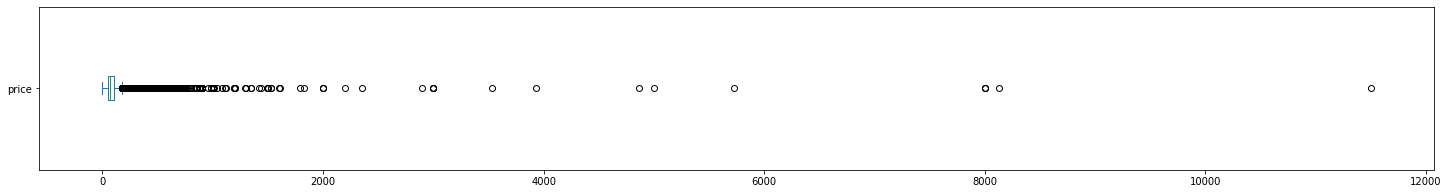

In [ ]:
# Plotar boxplot de price
DF.price.plot(kind = 'box', vert = False, figsize = (25,3));
plt.show()

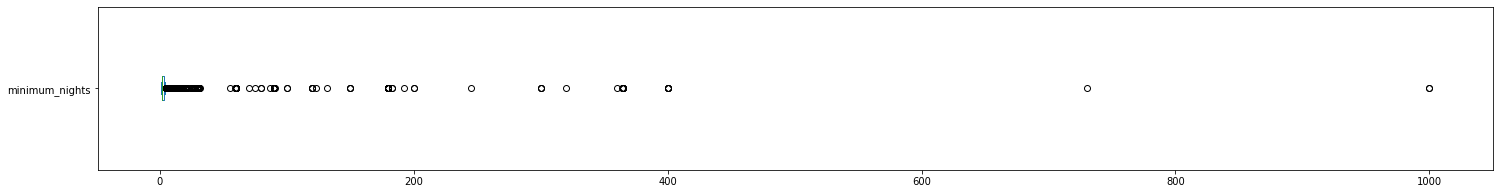

In [ ]:
# Plotar boxplor de minimum_nights
DF.minimum_nights.plot(kind = 'box', figsize = (25,3), vert = False);
plt.show();

#### Limpeza dos *outliers*

Como identificamos *outliers*, vamos proceder com a limpeza.

E para isso usaremos os limites calculados pela regra do IQRScore onde o IQR é calculado subtraindo o terceiro quartil (75%) pelo primeiro quartil (25%), ou seja, IQR = Q3 - Q1. E os limites são calculados fazendo (IQR x 1,5) mais o terceiro quartil(caso limite superior) ou menos o primeiro quartil(caso limite inferior) e o que  estiver fora desses limites é considerado *outlier*(veja os circulos pretos nos boxplots acima).

In [ ]:
#Calcular IQR para price
q1_price = DF.price.quantile(.25)
q3_price = DF.price.quantile(.75)
IQR_price = q3_price - q1_price
print("IQR de price: ", IQR_price)

#Calcular IQR para minimum_nights
q1_nights = DF.minimum_nights.quantile(.25)
q3_nights = DF.minimum_nights.quantile(.75)
IQR_nights = q3_nights - q1_nights
print("IQR de minimum_nights: ", IQR_nights)


IQR de price:  51.0
IQR de minimum_nights:  1.0


In [ ]:
# Definir os limites superiores e inferiores de price
SUP_price = q3_price + (1.5 * IQR_price)
INF_price = q1_price - (1.5 * IQR_price)
print("Variável price : Limite superior ", SUP_price, " e Limite inferior ", INF_price)

#Definir os limites superiores e inferiores de minimum_nights
SUP_nights = q3_nights + (1.5 * IQR_nights)
INF_nights = q1_nights - (1.5 * IQR_nights)
print("Variável minimum_nights: Limite superior ", SUP_nights, " e Limite inferior ", INF_nights)

Variável price : Limite superior  176.5  e Limite inferior  -27.5
Variável minimum_nights: Limite superior  4.5  e Limite inferior  0.5


É importante lembrar que *outliers* também são valores discrepantes abaixo do mínimo. Observamos isso nos resultados acima.

Agora, veja o limite inferior de `price` que deu-nos um número negativo, claro que não existe valor de pagamento negativo. Então em nosso caso consideraremos o limite inferior igual a 3 por duas razões: a primeira é que os valores iguais a 0 fogem da realidade e a segunda é que na região de Lisboa existe uma taxa chamada de *TAXA MUNICIPAL TURÍSTICA DE DORMIDA*[⁶](https://informacoeseservicos.lisboa.pt/servicos/detalhe/taxa-municipal-turistica-de-dormida) que está em torno de 2 euros por noite durante um intervalo de 7 dias e o Airbnb já cobra automáticamente no site. E como dito, não consideramos o valor 0, então tem-se o mínimo possível 3 euros.

E quanto a variável `minimum_nights` arredondaremos os resultados e assim ficaremos com o valor mínimo igual a 1 e o máximo igual a 5.

Mas antes, vejamos a quantidade e porcentagem de *outliers* em nosso DataFrame

In [ ]:
# Verificar a quantidade e porcentagem
print("Valores de price acima de 176.5 e abaixo de 3 : {}"
.format(len(DF[DF.price > 176.5]) + len(DF[DF.price < 3])))
print('Temos {:.2f}% de outliers no atributo price.'
.format(((len(DF[DF.price > 176.5]) + len(DF[DF.price < 3])) / DF.shape[0]) * 100))

print("\nValores de minimum_nights acima de 5 e abaixo de 1 : {}"
.format(len(DF[DF.minimum_nights > 5]) + len(DF[DF.minimum_nights < 1])))
print('Temos {:.2f}% de outliers no atributo minimum_nights.'
.format(((len(DF[DF.minimum_nights > 5]) + len(DF[DF.minimum_nights < 1])) / DF.shape[0])* 100))


Valores de price acima de 176.5 e abaixo de 3 : 1611
Temos 8.71% de outliers no atributo price.

Valores de minimum_nights acima de 5 e abaixo de 1 : 1439
Temos 7.78% de outliers no atributo minimum_nights.


Como visto, temos valores altos de *outliers* segundo a regra do IQRScore e eles podem pertecer a entradas diferentes, iguais ou intercaladas, mas isso não analisaremos nesta exploração inicial.

Dessa situação podemos tomar vários caminhos, desde usar outras metodologias até considerar aumentar os limites fornecidos pelo IQRScore de maneira que abarque mais dados e assim diminua o impacto da exclusão de informações relevantes. Porém, neste trabalho irei aceitar essas informações como válidas, deixando para um projeto posterior mais aprofundado a aplicação de outras metodologias e técnicas.

Prossigamos com a limpeza usando o método `.drop()`.

In [ ]:
#Remover outliers em um novo DataFrame
DF_clean = DF.copy()
DF_clean.drop(DF_clean[DF_clean.price > 176.5].index, axis = 0, inplace = True)
DF_clean.drop(DF_clean[DF_clean.price < 3].index, axis = 0, inplace = True)
DF_clean.drop(DF_clean[DF_clean.minimum_nights > 5].index, axis = 0, inplace = True)
DF_clean.drop(DF_clean[DF_clean.minimum_nights < 1].index, axis = 0, inplace = True)

Novo volume do DataFrame após a limpeza de dados ausentes e *outliers*

In [ ]:
# Novo volume
print("Quantidade de entradas:", DF_clean.shape[0])
print("Quantidade de variáveis:", DF_clean.shape[1], '\n')

Quantidade de entradas: 15609
Quantidade de variáveis: 15 



#### Boxplots e histogramas sem *outliers*

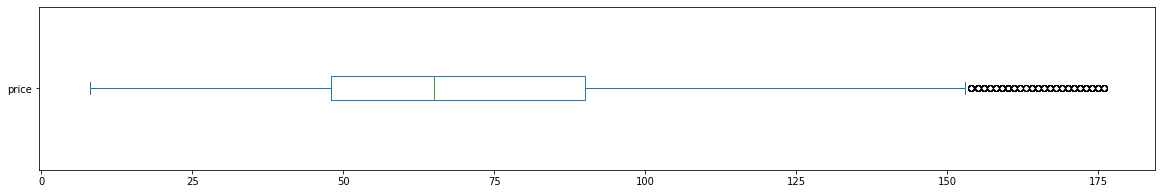

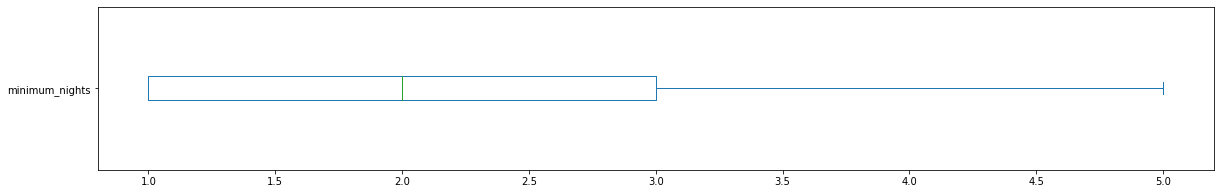

In [ ]:
DF_clean.price.plot(kind = 'box', figsize = (20,3), vert = False)
plt.show()
DF_clean.minimum_nights.plot(kind = 'box', figsize = (20,3), vert = False);

Em nossa análise, vimos que o limite superior de `price` é 176,5 e por causa disso não deveria aparecer *outliers*. Que é o que não ocorre no *boxplot* acima.

Poderíamos fazer e testar várias hipóteses do porquê isso acontece, bem como continuar a limpeza de maneira que seja excluída esses dados discrepantes. Mas nesta análise exploratória inicial nos contentamos com esses resultados.

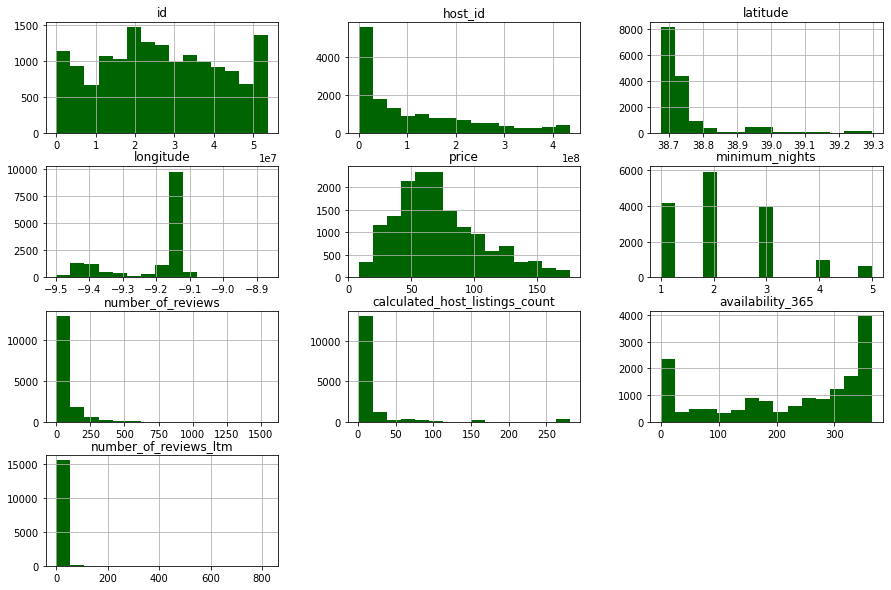

In [ ]:
#Plotar histogramas
DF_clean.hist(figsize = (15, 10), bins = 15, color = 'darkgreen');

Perceba como os histogramas dos atributos que excluímos as discrepancias estão mais distribuídos.

### **Q5. Qual a média dos preços dos aluguéis e da quantidade mínima de noites**

É interessante obter a média de algo porque ela é como uma espécie de "resumo" em que o conjunto de valores está em torno. Vamos ver a média dos preços abaixo:


In [ ]:
print("Média dos preços dos aluguéis: {:.2f} euros\n".format(DF_clean.price.mean()))
print("Média da quantidade mínima de noites: {:.0f}".format(DF_clean.minimum_nights.mean()))

Média dos preços dos aluguéis: 71.78 euros

Média da quantidade mínima de noites: 2


### **Q6. Qual a correlação existente entre as variáveis**

Correlação é um conceito ligado à área da probabilidade e estatística e significa que existe uma relação entre duas coisas. Neste nosso projeto, iremos identificar uma relação ou semelhança entre duas variáveis.

E para medir essa relação vou:

*  Criar uma matriz de correlação
*  Gerar a partir dessa matriz um *heatmap* com a biblioteca `seaborn`

In [ ]:
# Matriz de correlação com as variáveis numéricas
corr = DF_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365','number_of_reviews_ltm']].corr()

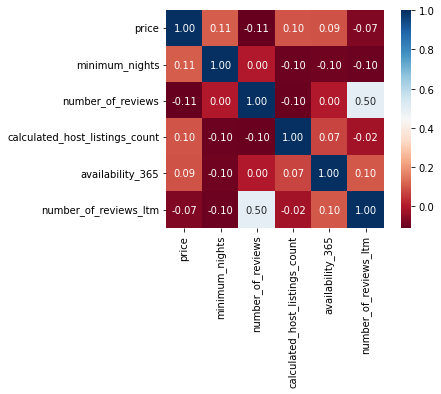

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Quais os tipos de imóveis e suas quantidades no Airbnb?**

A coluna `room_type` nos informa o tipo de imóvel que queremos alugar e acessando o site do Airbnb vemos que ele nos oferece várias opções desde alugar um apartamento inteiro até dividir o quarto com outras pessoas.

Vamos vê a quantidade e porcetagem de cada tipo disponível.

In [ ]:
# Quantidade dos tipos oferecidos
DF_clean.room_type.value_counts() 

Entire home/apt    11731
Private room        3364
Hotel room           265
Shared room          249
Name: room_type, dtype: int64

In [ ]:
# Porcentagem dos tipos oferecidos
DF_clean.room_type.value_counts() / DF_clean.shape[0] * 100

Entire home/apt    75.155359
Private room       21.551669
Hotel room          1.697738
Shared room         1.595234
Name: room_type, dtype: float64

### **Q9. Qual a localidade mais cara em Lisboa**

Um método que nos permiti agrupar dados e daí pode vê-los um em função do outro, assim sendo possível extrair  alguns *insights* é o método `.groupby()`. Vamos usá-lo para agrupar as informações das localidades(`neighbourhood`) e dos preços (`price`) e por fim fazer uma comparação entre os locais.

In [ ]:
#Agrupar Dados e exibir os 20 maiores
DF_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)[0:20]

neighbourhood
Arranh                                      150.000000
Turcifal                                    123.000000
Meca                                        119.000000
Peral                                       112.250000
Dois Portos e Runa                          112.000000
Maxial e Monte Redondo                      107.666667
Bucelas                                     101.800000
Vilar                                        98.500000
Parque das Naes                              93.109827
Ribamar                                      90.833333
Igreja Nova e Cheleiros                      90.437500
Alcoentre                                    90.000000
Carvoeira e Carmes                           85.000000
So Joo das Lampas e Terrugem                 82.894737
Venda do Pinheiro e Santo Estvo das Gals     82.750000
Barcarena                                    82.000000
A dos Cunhados e Maceira                     81.541667
Colares                                      81.285

Com as informações que temos da latitude e longitude, podemos plotar um gráfico do tipo *scatter* para cada entrada acima.

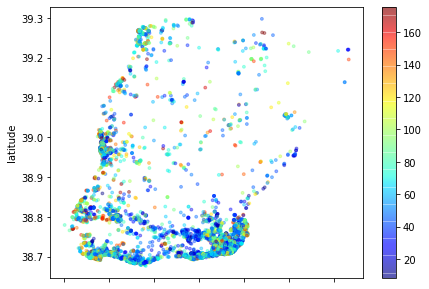

In [ ]:
# Plotar gráfico dos imóveis pela latitude e longitude
# x = longitude ; y = latitude

DF_clean.plot.scatter(x = 'longitude', y = 'latitude', alpha=0.4, c = DF_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(7,5));


<img alt="mapa" width="30%" src="https://i.pinimg.com/originals/4d/9c/41/4d9c41c1ab4a266d730232a718f5aa51.gif
">



Com uma comparação visual percebemos que grande dos imóveis estão na Cidade de Lisboa ou em partes costeiras do Distrito. De modo especial na cidade temos a proximidade com muitos dos pontos turísticos como a Praça do Comércio, o Museo do Fado, etc. 

Ademais, é importante notar a presença de localidades distantes que possuem média de valores muito altos comparados aos do centro turístico de Lisboa. Uma hipótese provável é que nesses lugares há uma ou poucas propriedades oferecidas no Airbnb enquanto na capital há muitas e isso causa uma queda no preço médio. Testemos abaixo essa hipótese tomando os 3 primeiros lugares na média aritmética do preço.

In [ ]:
DF_clean[DF_clean.neighbourhood == 'Arranh'].price

1006    150
1948    150
Name: price, dtype: int64

In [ ]:
DF_clean[DF_clean.neighbourhood == 'Turcifal'].price

4242     125
5686     118
7451     100
8778     160
14747    166
14791     69
Name: price, dtype: int64

In [ ]:
DF_clean[DF_clean.neighbourhood == 'Meca'].price

10980    119
Name: price, dtype: int64

Se você fazer uma rápida pesquisa no google maps perceberá a distancia do centro cosmopolita e isso confirma nossa hipótese. Então é importante fazer essa análise com as demais localidades em que existe a mesma suspeita mas neste trabalho não aprofundaremos isso.

### **Conclusões**

Foi realizada apenas uma análise de dados exploratória inicial na base de dados do Airbnb em sua versão resumida. Percebemos a presença de vários *outliers*, dados ausentes e que em algumas localidades há poucos imóveis que causam distorções nas informações que se deseja extrair.

Enfim, após essa abordagem inicial, é recomendado em uma próxima análise exploratória o uso do *dataset* completo (`listings.csv.gz`) com 74 variáveis para uma melhor compreesão.
